In [ ]:
import fceulib
import ppu_dump
import sys
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

from fceu_help import pointer_to_numpy

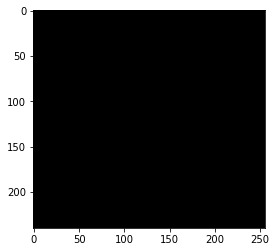

In [37]:
#rom = "mario.nes"

#movie = 'happylee4-smb-warpless.fm2'

# movie = "mario.fm2"
# start_t = 373
# rom = "metroid.nes"
# movie = "metroid.fm2"
# start_t = 518+39
rom = "metroid.nes"
movie ='lordtom-metroid-100.fm2'
#movie = "metroid-long.fm2"

#rom = 'zelda.nes'
#movie = 'baxter,jprofit22-legendofzelda.fm2'
#movie = 'zelda.fm2'
start_t = 0


# rom = "smb2u.nes"
# movie = "smb2u.fm2"
# start_t = 700
emu = fceulib.runGame(rom)
inputs1 = fceulib.readInputs(movie)
inputs2 = fceulib.readInputs2(movie)

for i,i2 in zip(inputs1[:start_t],inputs2[:start_t]):
    emu.stepFull(i, i2)
    
 
def convert_image(img_buffer):
    # TODO: without allocations/reshape?
    screen = pointer_to_numpy(img_buffer)
    return screen.reshape([256, 256, 4])[:240, :, :3].astype(np.uint8)
img_buffer = fceulib.VectorBytes()
np_image = np.zeros(shape=(240, 256, 1), dtype=np.uint8)
emu.imageInto(img_buffer)
np_image = convert_image(img_buffer)
plt.imshow(np_image)
plt.show()


    

NTS:
0 1 
2 3
M 0 base 0
Sc2: 0 0
T: 0


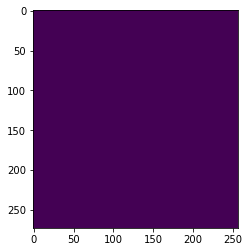

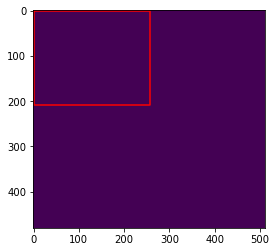

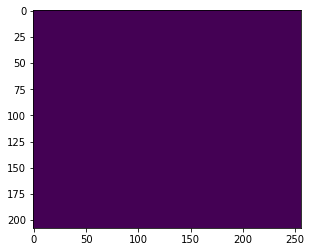

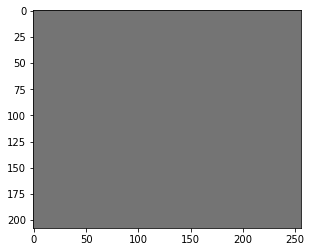

0 0 0 0 (0, 0)
Match1 1.0 1.0 (0, 0) (0, 0)
Sc1 Offset: 0 0 0 0
NTS:
0 1 
2 3
M 0 base 0
Sc2: 0 0
0 0 0 0 (0, 0)
Match1 1.0 1.0 (0, 0) (0, 0)
Sc1 Offset: 0 0 0 0
NTS:
0 1 
2 3
M 0 base 0
Sc2: 0 0
0 0 0 0 (0, 0)
Match1 1.0 1.0 (0, 0) (0, 0)
Sc1 Offset: 0 0 0 0
NTS:
0 1 
2 3
M 0 base 0
Sc2: 0 0
0 0 0 0 (0, 0)
Match1 1.0 1.0 (0, 0) (0, 0)
Sc1 Offset: 0 0 0 0
NTS:
0 1 
2 3
M 0 base 0
Sc2: 0 0
0 0 0 0 (0, 0)
Match1 1.0 1.0 (0, 0) (0, 0)
Sc1 Offset: 0 0 0 0
NTS:
0 1 
2 3
M 0 base 0
Sc2: 0 0
0 0 0 0 (0, 0)
Match1 1.0 1.0 (0, 0) (0, 0)
Sc1 Offset: 0 0 0 0
NTS:
3 2 
1 0
M 0 base 3
Sc2: 0 0
0 0 0 0 (0, 0)
Match1 0.0 0.0 (0, 0) (0, 0)
Sc1 Offset: 0 0 0 0
NTS:
0 1 
2 3
M 1 base 0
Sc2: 2 25
2 25 0 0 (2, -5)
Match1 1.0 1.0 (0, 0) (0, 0)
Sc1 Offset: 0 0 0 0
NTS:
0 1 
2 3
M 1 base 0
Sc2: 0 0
0 0 2 25 (-2, 5)
Match1 1.0 1.0 (0, 0) (0, 0)
Sc1 Offset: 0 0 0 0
NTS:
0 1 
2 3
M 1 base 0
Sc2: 0 0
0 0 0 0 (0, 0)
Match1 1.0 1.0 (0, 0) (0, 0)
Sc1 Offset: 0 0 0 0
NTS:
0 1 
2 3
M 1 base 0
Sc2: 0 0
0 0 0 0 (0, 0)


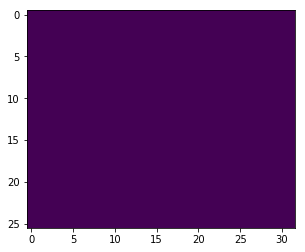

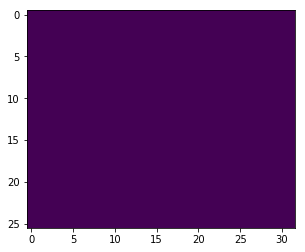

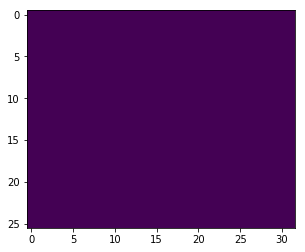

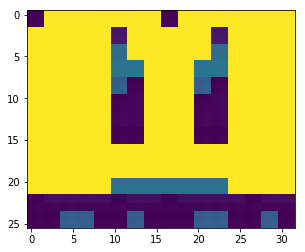

In [38]:
reload(ppu_dump)

end = 35
#METROID
scroll_area= (0,4,32,30-4)

#ZELDA
#scroll_area= (0,8,32,30-8)

ep_data = ppu_dump.ppu_output(emu,
                              inputs1[start_t:end],
                              inputs2=inputs2[start_t:end],
                              bg_data=True,
                              scrolling=True,
                              sprite_data=True,
                              colorized_tiles=False,
                              display=False,
                              test_control=True,
                            scroll_area= scroll_area )

nt = ep_data["nametables"][0]
plt.imshow(nt)
plt.show()
nt = ep_data["nametables"][1]
plt.imshow(nt)
plt.show()
nt = ep_data["nametables"][2]
plt.imshow(nt)
plt.show()

nt = ep_data["nametables"][-1]
plt.imshow(nt)
plt.show()

In [ ]:
from unionfind import UnionFind

In [ ]:
posx, posy = 0, 0
nt_total = {}
nt_totals = [nt_total]
tilex = 0
tiley = 0
interstitial = False
prev = None
curr = None
gap =60
big_gap = 90
timeSinceControl = 0
accum = 0
for t, (sx, sy) in sorted(ep_data["tilemap_motion"].items()):
    nt = ep_data["nametables"][t]
    attr = ep_data["attr"][t]
    pal = ep_data['palettes'][t]
    if sx >= 16:
        sx -= 32
    if sx <= -16:
        sx += 32
    if sy >= 15:
        sy -= 30
    if sy <= -15:
        sy += 30
    
    tilex += sx
    tiley += sy
    if not ep_data['has_controls'][t]:
        timeSinceControl += 1
    else:
        timeSinceControl  = 0
    if t > 4753 and t < 6500:
        print t, timeSinceControl, sx,sy
    if timeSinceControl > gap and ((sx != 0 or sy != 0) or timeSinceControl > big_gap):
        if not interstitial:
            #print t, timeSinceControl
            #plt.imshow(nt)
            #plt.show()
            pass
        interstitial = True
    #print t, timeSinceControl
    #print t, timeSinceControl,interstitial
    if  True:
        #print "t", t, "scroll by", sx, sy, tilex, tiley
        for x in range(0, 32):
            for y in range(0, scroll_area[3]):
                key = (y+tiley, x+tilex)
                if key not in nt_total:
                    nt_total[key] = {}
                nt_total[key][t] = (int(nt[y, x]),int(attr[y, x]),pal)
    prev = curr
    curr = {}
    diff = 0
    for x in range(0, 32):
        for y in range(0, 26):
            key = (y+tiley, x+tilex)
            if key not in curr:
                curr[key] = (int(nt[y, x]),int(attr[y, x]),pal)
            if prev:
                if key not in prev:
                    diff += 1
                elif curr[key] != prev[key]:
                    diff += 1  
    print t,diff
    if diff > scroll_area[2]*scroll_area[3]*0.95:
        #plt.imshow(nt)
        #plt.show()
        interstitial = False
        nt_total = {}
        nt_totals.append(nt_total) 
   
    
for nt_id,nt_total in enumerate(nt_totals):
    if len(nt_total) > 0:
        minx = min(map(lambda (y, x): x,nt_total.keys()))
        maxx = max(map(lambda (y, x): x,nt_total.keys()))+1
        miny = min(map(lambda (y, x): y,nt_total.keys()))
        maxy = max(map(lambda (y, x): y,nt_total.keys()))+1
        nt_result = {}
        for x in range(minx, maxx):
            for y in range(miny, maxy):
                if (y,x) in nt_total:
                    nt_result[y-miny, x-minx] = nt_total[(y, x)]
        colorized = ep_data["tile2colorized"]
        out_image = np.zeros(shape=((maxy-miny)*8, (maxx-minx)*8, 4))
        for x in range(0, maxx-minx):
            for y in range(0, maxy-miny):
                col = np.zeros(shape=(8,8,3))
                if (y,x) in nt_result:
                    ind = sorted(nt_result[y, x])[-1]
                    col = colorized[nt_result[y, x][ind]]
                out_image[y*8:(y+1)*8, x*8:(x+1)*8, :3] = col/255.
                out_image[y*8:(y+1)*8, x*8:(x+1)*8, 3] = 1.0
        plt.figure(figsize=(20,10)) 
        plt.imshow(out_image)
        plt.savefig('{}.png'.format(nt_id))
        plt.show()

In [ ]:
def room2attr(room):
    
    minx = min(map(lambda (y, x): x,room.keys()))
    maxx = max(map(lambda (y, x): x,room.keys()))+1
    miny = min(map(lambda (y, x): y,room.keys()))
    maxy = max(map(lambda (y, x): y,room.keys()))+1
    attr_room = np.zeros((maxy-miny,maxx-minx,2))
    for x in range(minx, maxx):
        for y in range(miny, maxy):
            if (y,x) in room:
                ind = sorted(room[y, x])[0]
                attr_room[int(y-miny), int(x-minx),:] = np.array(room[(y, x)][ind][:-1])
    return attr_room
unions = UnionFind()

def dict_compare(d1, d2):
    d1_keys = set(d1.keys())
    d2_keys = set(d2.keys())
    intersect_keys = d1_keys.intersection(d2_keys)
    added = d1_keys - d2_keys
    removed = d2_keys - d1_keys
    modified = {o : (d1[o], d2[o]) for o in intersect_keys if d1[o] != d2[o]}
    same = set(o for o in intersect_keys if d1[o] == d2[o])
    return added, removed, modified, same

for room_id,room in enumerate(nt_totals):
    minx = min(map(lambda (y, x): x,room.keys()))
    maxx = max(map(lambda (y, x): x,room.keys()))+1
    miny = min(map(lambda (y, x): y,room.keys()))
    maxy = max(map(lambda (y, x): y,room.keys()))+1

    for other_id,other in enumerate(nt_totals):
        if len(room) > 0 and len(other) > 0:
            if room2attr(room).shape == room2attr(other).shape:
                if np.sum(np.abs(room2attr(room)-room2attr(other))) == 0:
                    unions.union(room_id,other_id)

            
cluster2room = {}

for u in unions:
    if unions[u] not in cluster2room:
        cluster2room[unions[u]] = set()
    cluster2room[unions[u]].add(u)
print 'digraph G{\n\trankdir=LR;\npenwidth=10;\n'

for cluster in cluster2room:
    print '\tsubgraph cluster_{} {{'.format(cluster)
    print '\t\tcolor=blue;'
    for room in cluster2room[cluster]:
        print '\t\t n{}[image="{}.png", label="{}", fontsize=240,fontcolor=red];'.format(room,room,room);
    print '\t}'
for ii in range(1,len(nt_totals)):
    print 'n{} -> n{} [penwidth=10];'.format(ii-1,ii)
print '}'

In [ ]:
for room_id, nt_total in enumerate(nt_totals):
    minx = min(map(lambda (y, x): x,nt_total.keys()))
    maxx = max(map(lambda (y, x): x,nt_total.keys()))+1
    miny = min(map(lambda (y, x): y,nt_total.keys()))
    maxy = max(map(lambda (y, x): y,nt_total.keys()))+1
    print room_id, (minx+maxx)/2, (miny+maxy)/2
    nt_result = {}
    for x in range(minx, maxx):
        for y in range(miny, maxy):
            if (y,x) in nt_total:
                nt_result[y-miny, x-minx] = nt_total[(y, x)]
    colorized = ep_data["tile2colorized"]
    out_image = np.zeros(shape=((maxy-miny)*8, (maxx-minx)*8, 4))
    for x in range(0, maxx-minx):
        for y in range(0, maxy-miny):
            col = np.zeros(shape=(8,8,3))
            if (y,x) in nt_result:
                col = colorized[nt_result[y, x].values()[-1]]
            out_image[y*8:(y+1)*8, x*8:(x+1)*8, :3] = col/255.
            out_image[y*8:(y+1)*8, x*8:(x+1)*8, 3] = 1.0
    plt.figure(figsize=(20,10)) 
    plt.imshow(out_image)
    plt.savefig("{}.png".format(room_id),bbox_inches='tight')
    plt.show()